# CMP4336 – Introduction to Data Mining
## Homework 1
## Furkan Kılıçaslan - 1504164

In [234]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [235]:
# Read in the crx_data.txt as a csv file
index = ["A1","A2","A3","A4","A5","A6","A7","A8","A9","A10","A11","A12","A13","A14","A15","A16"]
df = pd.read_csv("crx_data.txt",names=index)

## Question 1

* Replace the missing values using one of the methods we have discussed in the lecture hour.

In [236]:
# Replace the ? values with the np.nan
df.replace("?",np.nan,inplace=True)
# Fill NaN values with padding method(Propogate the last valid value to missing value)
df.fillna(method="pad",inplace=True)
# Turn object type frames to numeric for further processing
df[["A2","A11","A14"]] = df[["A2","A11","A14"]].apply(pd.to_numeric, errors='coerce')
df.head(3)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.00,u,g,w,v,1.25,t,t,1,f,g,202,0,+
1,a,58.67,4.46,u,g,q,h,3.04,t,t,6,f,g,43,560,+
2,a,24.50,0.50,u,g,q,h,1.50,t,f,0,f,g,280,824,+


# Question 2
* Calculate the mean, standard deviation, mode, and skewness of all numerical attributes and report them.

In [237]:
# Convert object type attributes to numericals
df = df.infer_objects()
# Print mean of all numerical attributes
df.mean()

A2       31.483058
A3        4.758725
A8        2.223406
A11       2.400000
A14     183.792754
A15    1017.385507
dtype: float64

In [238]:
# Print standard deviation of all numerical attributes
df.std()

A2       11.912872
A3        4.978163
A8        3.346513
A11       4.862940
A14     173.567750
A15    5210.102598
dtype: float64

In [239]:
# Print the mode of all columns
df.mode()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,22.67,1.5,u,g,c,v,0.0,t,f,0,f,g,0,0,-


In [240]:
# Print skewness of all columns
df.skew()

A2      1.151992
A3      1.488813
A8      2.891330
A11     5.152520
A14     2.688681
A15    13.140655
dtype: float64

# Question 3
* Find the most frequent value of each categorical variable.

In [241]:
# Most frequent value of each categorical variable
df.mode()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,22.67,1.5,u,g,c,v,0.0,t,f,0,f,g,0,0,-


# Question 4

Plot the probability distribution of both continuous and random variables.

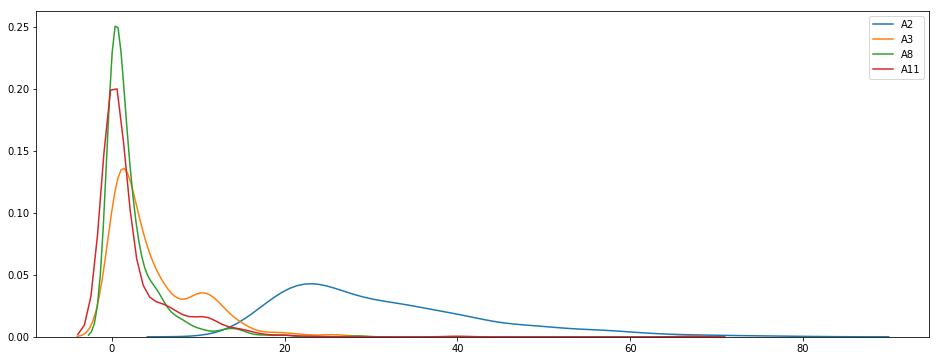

In [242]:
fig, ax = plt.subplots(figsize=(16,6))
sns.kdeplot(df["A2"],ax=ax)
sns.kdeplot(df["A3"],ax=ax)
sns.kdeplot(df["A8"],ax=ax)
sns.kdeplot(df["A11"],ax=ax)


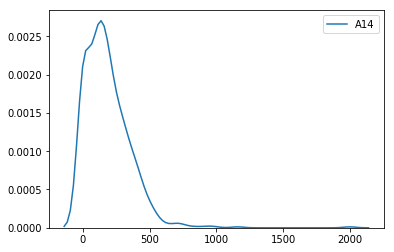

In [243]:
# A14 and A15 are plotted separately as they are very skewed and have very large values
# which distorts the graph for other attributes
sns.kdeplot(df["A14"])

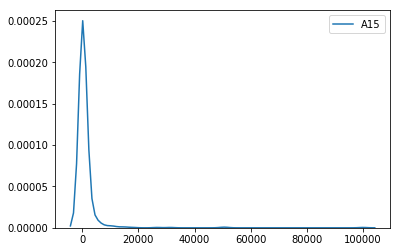

In [244]:
sns.kdeplot(df["A15"])

# Question 5 
* Using “academic-emphasis” attribute as the class variable, plot the scatter plots of each pair of attributes.

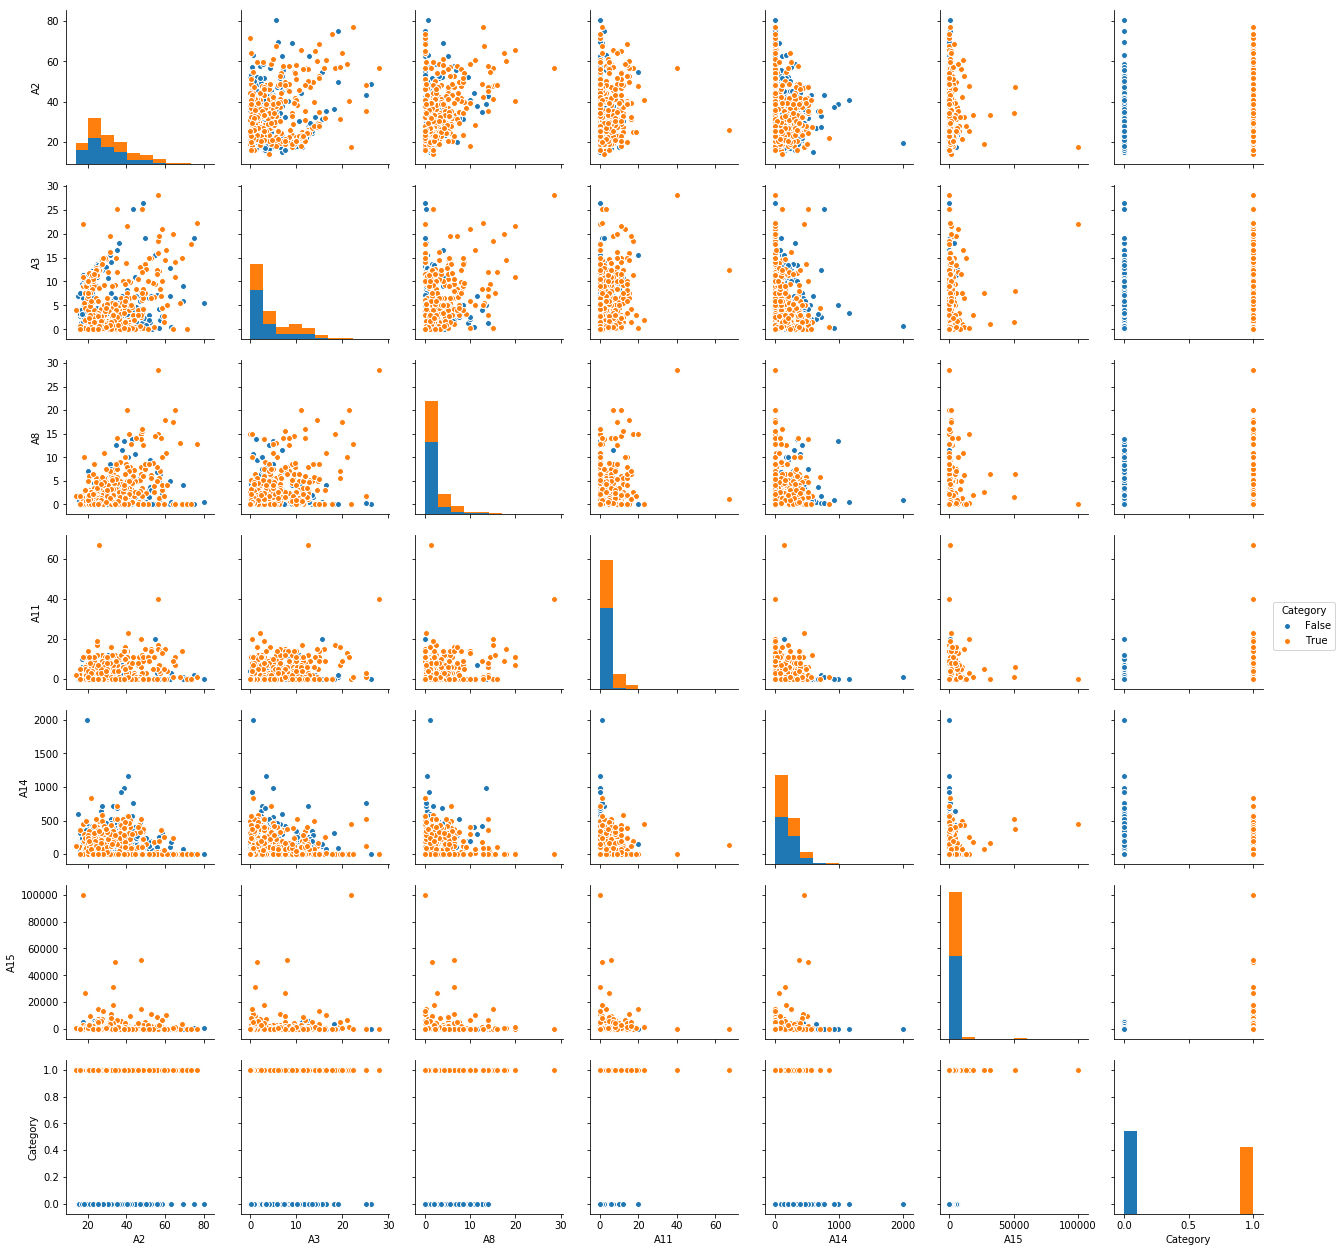

In [245]:
# Using Category attribute created from A16 as a class attribute here
df["Category"] = (df["A16"] == "+")
g = sns.pairplot(data=df,hue="Category")


# Question 6 
* Compute the distance matrix using Euclidean distance.

In [246]:
# Put the numeric columns on a new dataframe df_numerics
df_numerics = df[["A2","A3","A8","A11","A14","A15"]]
df_numerics.head(3)

,A2,A3,A8,A11,A14,A15
0,30.83,0.00,1.25,1,202,0
1,58.67,4.46,3.04,6,43,560
2,24.50,0.50,1.50,0,280,824


In [247]:
from sklearn.metrics.pairwise import pairwise_distances
# Calculate the pairwise euclidean distances of each row 
euclidean_distance = pd.DataFrame(sklearn.metrics.pairwise.pairwise_distances(df_numerics, metric='euclidean', n_jobs=1,))
# Showing the head of the dataframe (First 5 row of 690 rows)
euclidean_distance.head()

,0,1,2,3,4,5,6,7,8,9,...,680,681,682,683,684,685,686,687,688,689
0,0.000000,582.841455,827.708512,102.208716,82.888406,158.063674,31285.023639,1354.578992,315.666093,1449.837582,...,372.438417,537.642132,63.637440,38.551950,198.282498,59.680564,394.092262,14.796922,754.157261,202.196294
1,582.841455,0.000000,356.492135,560.766561,566.613074,644.074942,30725.249811,790.736257,281.701243,882.214652,...,310.129393,138.625679,567.932579,591.277307,664.389817,601.807987,231.369500,581.682645,306.582236,562.204597
2,827.708512,356.492135,0.000000,840.525570,839.417095,827.917089,30461.222521,561.918593,520.577812,658.979715,...,460.028812,305.284439,833.875409,822.060817,832.854339,824.305545,437.387313,826.982353,74.306898,870.368094
3,102.208716,560.766561,840.525570,0.000000,22.661077,260.114737,31282.066449,1346.209409,322.264106,1439.887823,...,403.520660,539.405093,41.908081,140.390275,300.332628,160.495575,403.633884,100.860104,768.471050,100.545451
4,82.888406,566.613074,839.417095,22.661077,0.000000,240.302128,31285.034345,1349.609897,321.559311,1443.776039,...,397.651767,539.987713,20.515627,121.235695,280.758303,140.074735,402.082205,80.559954,766.901055,121.112707


# Question 7 
* Compute the distance matrix using Mahalonobis distance.

In [248]:
# Calculate the pairwise mahalanobis distances of each row 
mahalanobis_distance = pd.DataFrame(sklearn.metrics.pairwise.pairwise_distances(df_numerics, metric='mahalanobis', n_jobs=1,))
# Showing the head of the dataframe (First 5 row of 690 rows)
mahalanobis_distance.head()

,0,1,2,3,4,5,6,7,8,9,...,680,681,682,683,684,685,686,687,688,689
0,0.000000,2.596480,0.812845,1.264686,1.707482,1.458941,6.327623,2.771553,2.089358,1.589695,...,1.081524,0.840334,1.511843,0.735171,1.755106,2.582334,0.901169,3.041470,1.200680,2.610099
1,2.596480,0.000000,3.289265,2.939864,3.619574,3.139158,6.877785,3.864136,1.696753,1.986532,...,3.582271,3.062224,3.679628,2.278559,2.867568,4.092385,3.283375,4.104405,3.691748,3.659384
2,0.812845,3.289265,0.000000,1.466583,1.429598,1.146969,6.213854,2.635170,2.642530,2.037129,...,0.506032,0.773136,1.230062,1.253083,1.689355,2.183731,0.662966,2.770535,0.633813,2.660389
3,1.264686,2.939864,1.466583,0.000000,1.726124,2.150953,6.311361,2.972488,2.763426,2.034838,...,1.622053,1.123496,1.638793,1.909653,2.516182,2.836351,0.909086,3.200344,1.684039,2.168485
4,1.707482,3.619574,1.429598,1.726124,0.000000,1.790167,6.543013,1.543420,3.324896,2.034906,...,1.367058,1.350156,0.597507,2.068079,2.494700,1.447614,1.297334,1.877592,1.389282,2.525934


# Question 8 
* Choose one of the discretization methods we have discussed in the lecture and discretize all numerical attributes using that method.

In [249]:
# Discretize each numerical attribute with tens quantile(deciles)
a2disc = pd.qcut(df_numerics["A2"], q = 10, duplicates="drop")
a3disc = pd.qcut(df_numerics["A3"], q = 10, duplicates="drop")
a8disc = pd.qcut(df_numerics["A8"], q = 10, duplicates="drop")
a11disc = pd.qcut(df_numerics["A11"], q = 10, duplicates="drop")
a14disc = pd.qcut(df_numerics["A14"], q = 10, duplicates="drop")
a15disc = pd.qcut(df_numerics["A15"], q = 10, duplicates="drop")

# Print one as an example
a8disc

0           (1.0, 1.5]
1          (2.25, 3.5]
2           (1.0, 1.5]
3          (3.5, 5.75]
4          (1.5, 2.25]
5          (2.25, 3.5]
6         (5.75, 28.5]
7      (-0.001, 0.125]
8          (3.5, 5.75]
9          (2.25, 3.5]
10         (1.5, 2.25]
11         (3.5, 5.75]
12          (0.5, 1.0]
13     (-0.001, 0.125]
14         (3.5, 5.75]
15       (0.125, 0.25]
16          (0.5, 1.0]
17         (2.25, 3.5]
18          (0.5, 1.0]
19          (0.5, 1.0]
20         (2.25, 3.5]
21          (0.5, 1.0]
22        (5.75, 28.5]
23         (2.25, 3.5]
24         (0.25, 0.5]
25          (1.0, 1.5]
26         (3.5, 5.75]
27        (5.75, 28.5]
28        (5.75, 28.5]
29         (3.5, 5.75]
            ...       
660    (-0.001, 0.125]
661      (0.125, 0.25]
662         (0.5, 1.0]
663         (1.0, 1.5]
664    (-0.001, 0.125]
665    (-0.001, 0.125]
666      (0.125, 0.25]
667        (1.5, 2.25]
668    (-0.001, 0.125]
669         (1.0, 1.5]
670        (3.5, 5.75]
671        (0.25, 0.5]
672        